# Autoencoder on Iris Dataset

In [94]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [95]:
# more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

/tmp/ipykernel_17833/2071146880.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [96]:
# load Iris dataset
iris = load_iris()
X = iris.data # predictor
y = iris.target #response

print('The predictor variable shape: ', X.shape)
print('The response variable shape: ', y.shape)

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

The predictor variable shape:  (150, 4)
The response variable shape:  (150,)


In [97]:
input_dim = X_scaled.shape[1] #input shape
output_dim = X_scaled.shape[1]
encoding_dim = 2 # encoding dimension - #neurons for the dense layers
optimizer = 'adam'
loss = 'mse'

input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=optimizer, loss=loss)
autoencoder.summary()

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 10        
                                                                 
 decoding (Dense)            (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


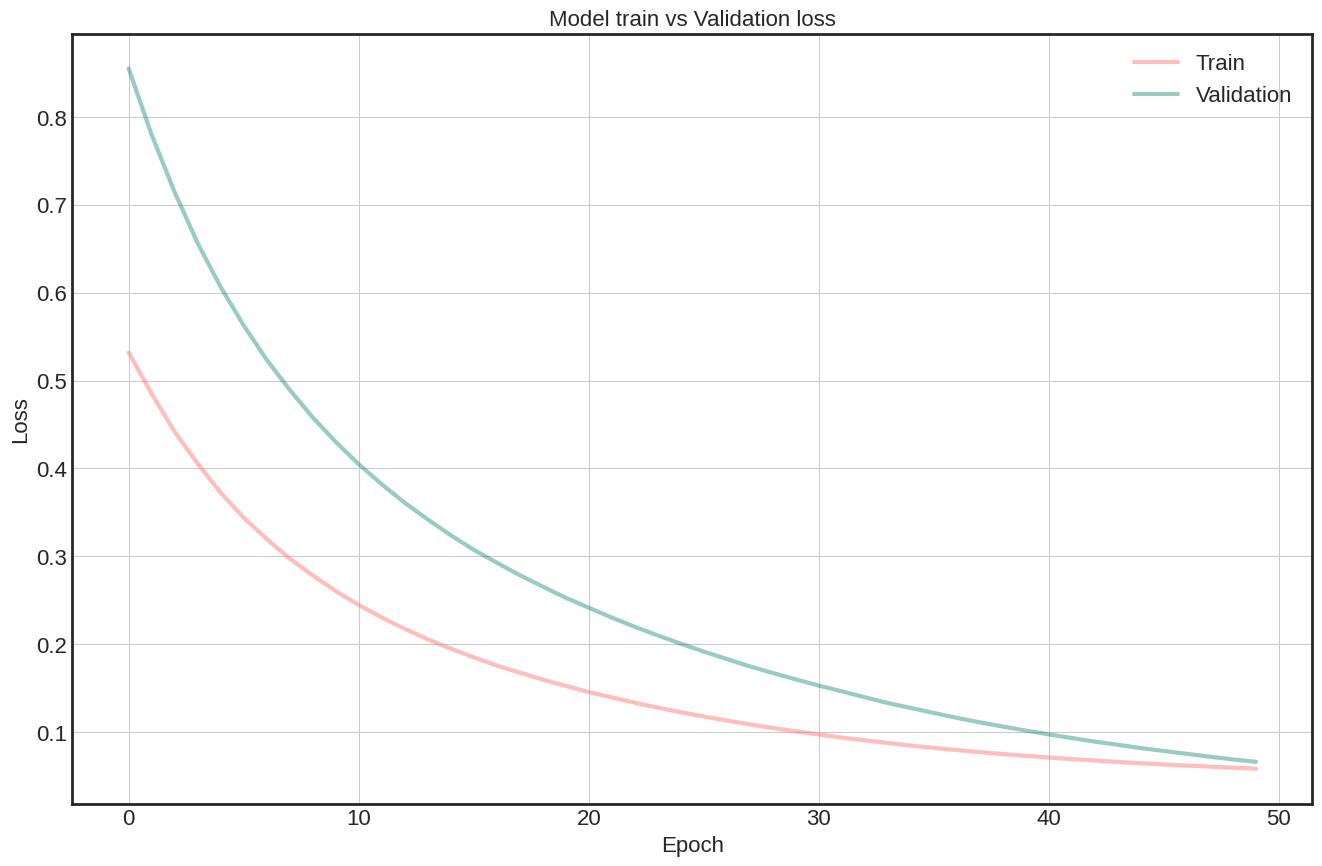

In [98]:
# Set other parameters
epochs=50
batch_size=16
shuffle=True
validation_split=0.1
verbose=0

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose)
#                           callbacks=[early_stop])

# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [102]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 0.058617886155843735
Validation loss: 0.06632693856954575


In [99]:
def plot3clusters(X, title, vtitle, target_names):
    colors = ['#A43F98', '#5358E0', '#DE0202']
    s = 50
    alpha = 0.7
    
    plt.figure(figsize=(9, 7))
    plt.grid(True)
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=alpha, s=s, label=target_name)
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title, fontsize=16, fontweight='bold')
    
    plt.text(0.5, -0.1, 'Principal Component 1', ha='center', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    plt.text(-0.1, 0.5, 'Principal Component 2', va='center', rotation='vertical', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.show()

5/5 [==============================] - 0s 1ms/step


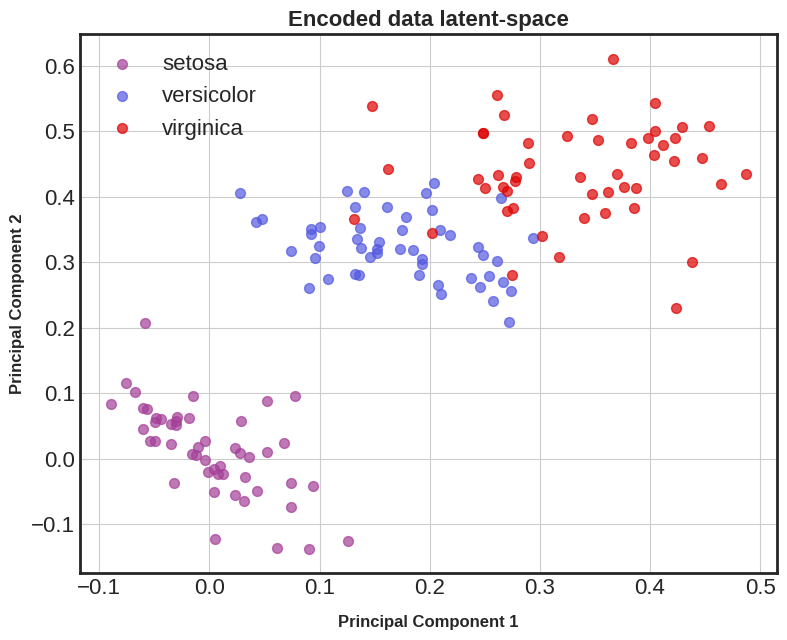

In [100]:
encoder = tf.keras.Model(input_layer, encoding_layer)
encoded_data = encoder.predict(X_scaled)

target_names = iris.target_names

plot3clusters(encoded_data, 'Encoded data latent-space', 'dimension ', target_names);

## Frobenious - loss = 'frobenius'

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

2023-05-12 18:50:05.436250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

In [3]:
# load Iris dataset
iris = load_iris()
X = iris.data # predictor
y = iris.target #response

print('The predictor variable shape: ', X.shape)
print('The response variable shape: ', y.shape)

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

The predictor variable shape:  (150, 4)
The response variable shape:  (150,)


In [4]:
input_dim = X_scaled.shape[1] #input shape
output_dim = X_scaled.shape[1]
encoding_dim = 2 # encoding dimension - #neurons for the dense layers
optimizer = 'adam'
# loss = 'mae'
def frobenius_loss(y_true, y_pred):
    return tf.norm(y_true - y_pred)
loss=frobenius_loss

input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=optimizer, loss=loss)
autoencoder.summary()

# Set other parameters
epochs=50
batch_size=16
shuffle=True
validation_split=0.1
verbose=0

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose)
#                           callbacks=[early_stop])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 10        
                                                                 
 decoding (Dense)            (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


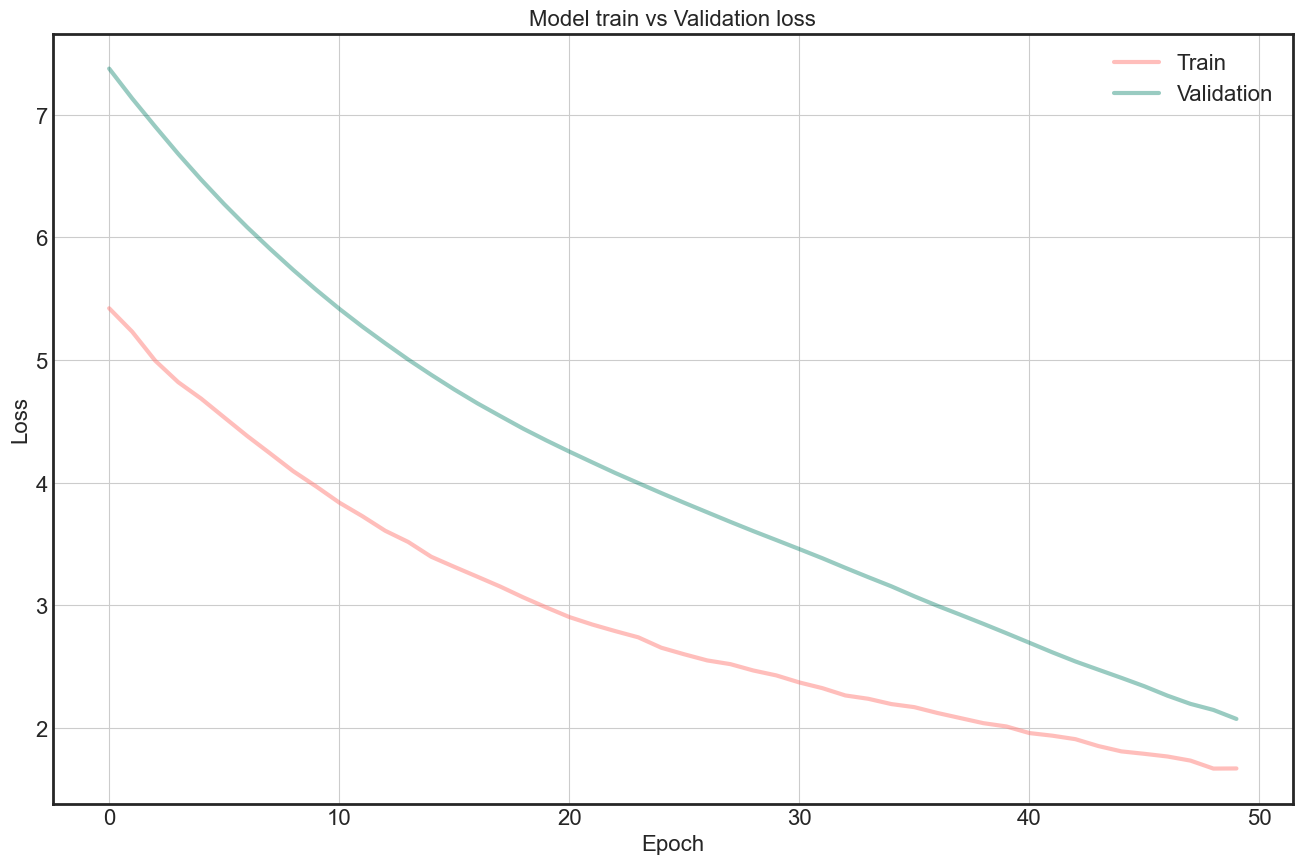

In [5]:
# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [6]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 1.6710536479949951
Validation loss: 2.074756383895874


In [7]:
def plot3clusters(X, title, vtitle, target_names):
    colors = ['#A43F98', '#5358E0', '#DE0202']
    s = 50
    alpha = 0.7
    
    plt.figure(figsize=(9, 7))
    plt.grid(True)
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=alpha, s=s, label=target_name)
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title, fontsize=16, fontweight='bold')
    
    plt.text(0.5, -0.1, 'Principal Component 1', ha='center', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    plt.text(-0.1, 0.5, 'Principal Component 2', va='center', rotation='vertical', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.show()

5/5 [==============================] - 0s 2ms/step


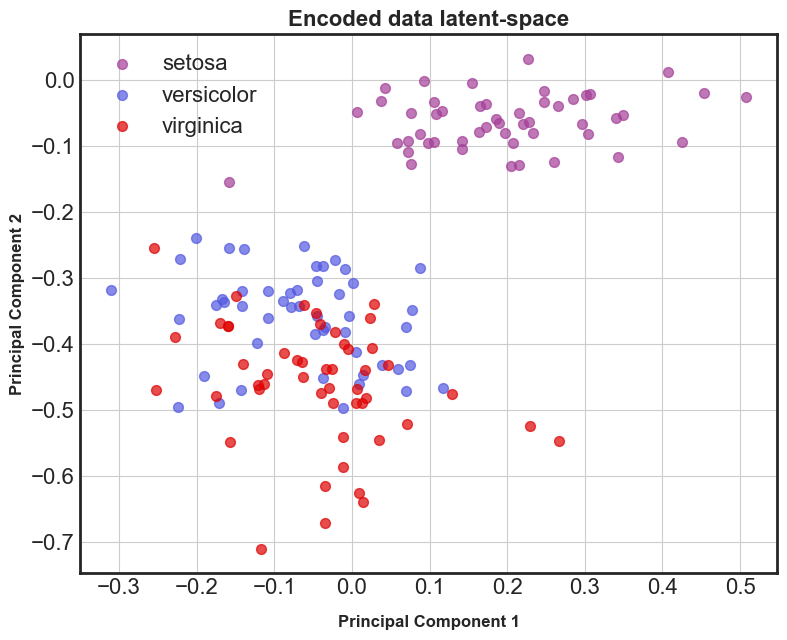

In [8]:
encoder = tf.keras.Model(input_layer, encoding_layer)
encoded_data = encoder.predict(X_scaled)

target_names = iris.target_names

plot3clusters(encoded_data, 'Encoded data latent-space', 'dimension ', target_names);

# Autoencoder on Swiss Dataset

In [20]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


In [21]:
# more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

In [22]:
from sklearn.datasets import make_swiss_roll

# Load the dataset
X, y = make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (1000, 3)
y shape:  (1000,)


In [23]:
print('X: ', X[:5])
print('y: ', y[:5])

X:  [[-1.82957451 13.85188055  7.87252725]
 [ 7.37461341  5.14046153 11.38199736]
 [ 6.10863015 13.08300154 -9.80560351]
 [-8.40096392  9.26508847 -5.42025453]
 [-7.90935906 20.51398367  4.16697207]]
y:  [ 8.08232814 13.56225596 11.55271494  9.99776745  8.93988909]


In [24]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


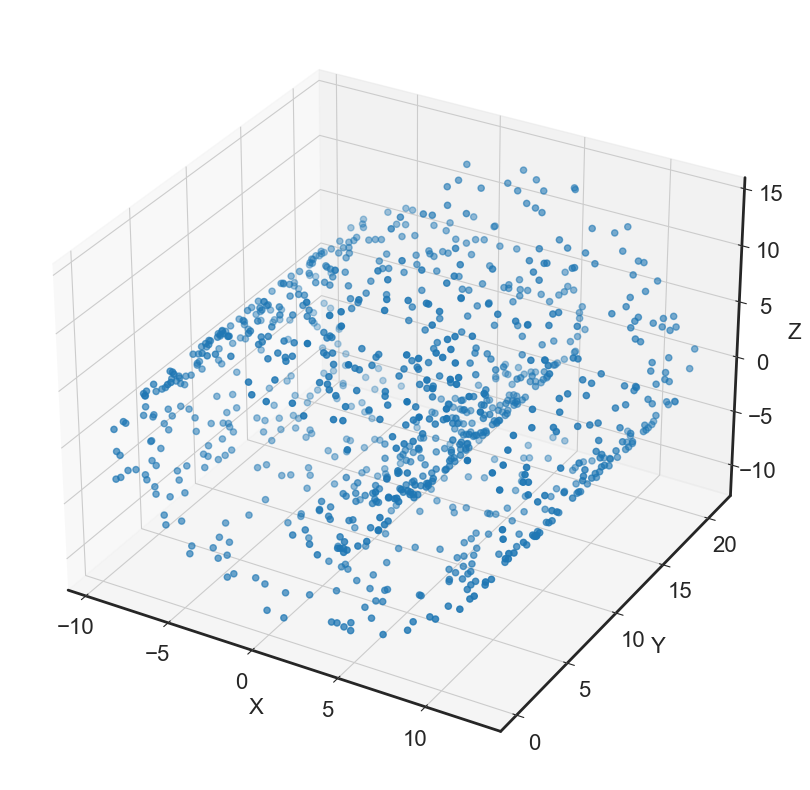

In [25]:
import matplotlib.pyplot as plt

# Plot the input data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [26]:
input_dim = X.shape[1]
output_dim = X.shape[1]
encoding_dim = 2

optimizer = 'adam'
loss = 'mse'

In [27]:
input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, activation='relu', name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, activation='sigmoid', name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=optimizer, loss=loss)
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 8         
                                                                 
 decoding (Dense)            (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Train the autoencoder model

epochs=50
batch_size=32
shuffle=True
validation_split=0.2
verbose=0

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose,
                          callbacks=[early_stop])

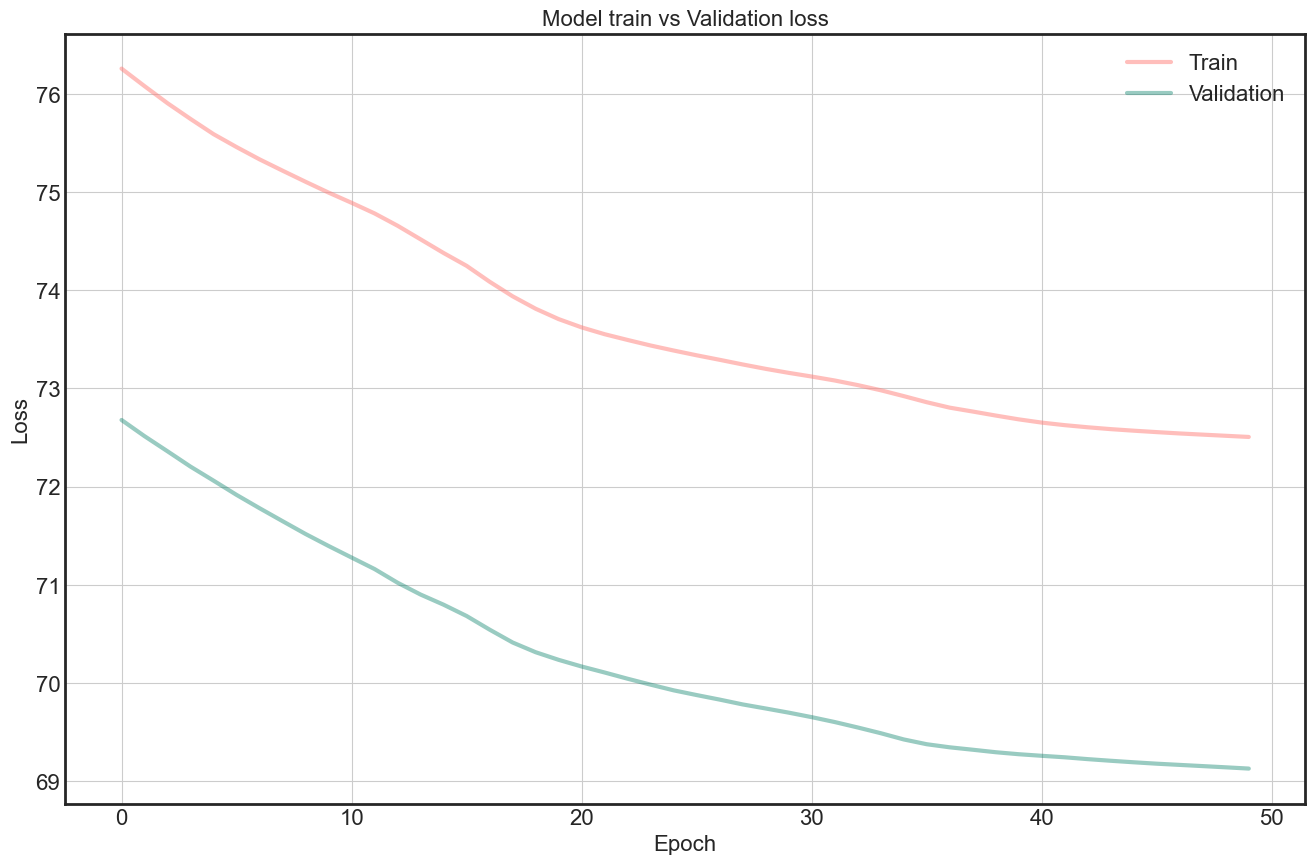

In [29]:
# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [30]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 72.50619506835938
Validation loss: 69.12744140625


In [31]:
# Extract the encoded representation of the input data
from tensorflow.keras.models import Model
encoder = Model(inputs=input_layer, outputs=encoding_layer)
encoded_X = encoder.predict(X_test)

print(encoded_X.shape)

7/7 [==============================] - 0s 3ms/step
(200, 2)


In [32]:


# # Plot the encoded representation
# fig = plt.figure()
# ax = fig.add_subplot()
# ax.scatter(encoded_X[:,0], encoded_X[:,1])
# ax.set_xlabel('Encoding 1')
# ax.set_ylabel('Encoding 2')
# plt.show()

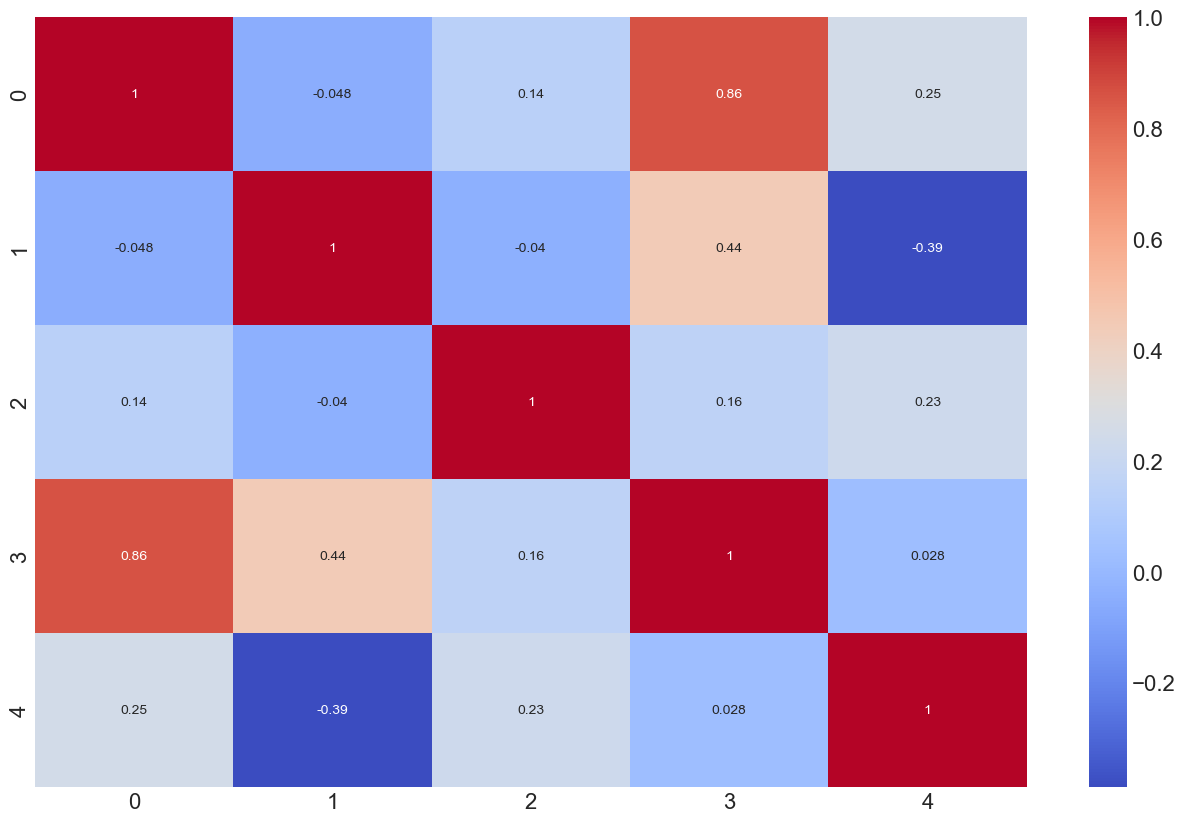

In [33]:
import numpy as np
import seaborn as sns
corr_mat = np.corrcoef(X_test.T, encoded_X.T)

# Display the correlation matrix as a heatmap
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

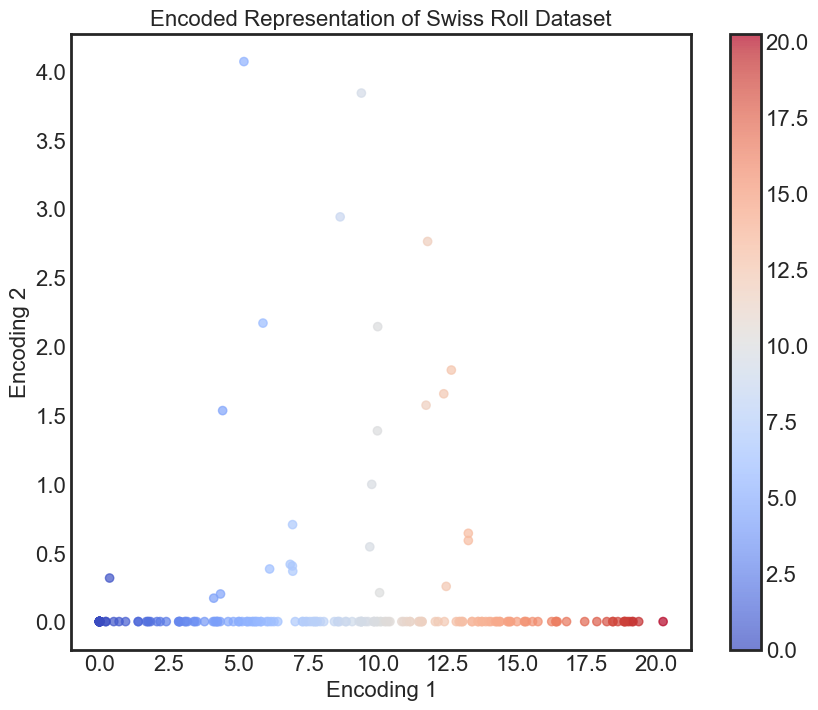

In [34]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sc = ax.scatter(encoded_X[:,0], encoded_X[:,1], c=encoded_X[:,0], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('Encoding 1')
ax.set_ylabel('Encoding 2')
plt.title('Encoded Representation of Swiss Roll Dataset')
plt.colorbar(sc)
plt.show()

## Frobenious - loss = frobenius

In [35]:
# loss='mae'
def frobenius_loss(y_true, y_pred):
    return tf.norm(y_true - y_pred)
loss=frobenius_loss

In [36]:
input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, activation='relu', name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, activation='sigmoid', name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=optimizer, loss=loss)
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 8         
                                                                 
 decoding (Dense)            (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the autoencoder model

epochs=50
batch_size=32
shuffle=True
validation_split=0.2
verbose=0

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose,
                          callbacks=[early_stop])

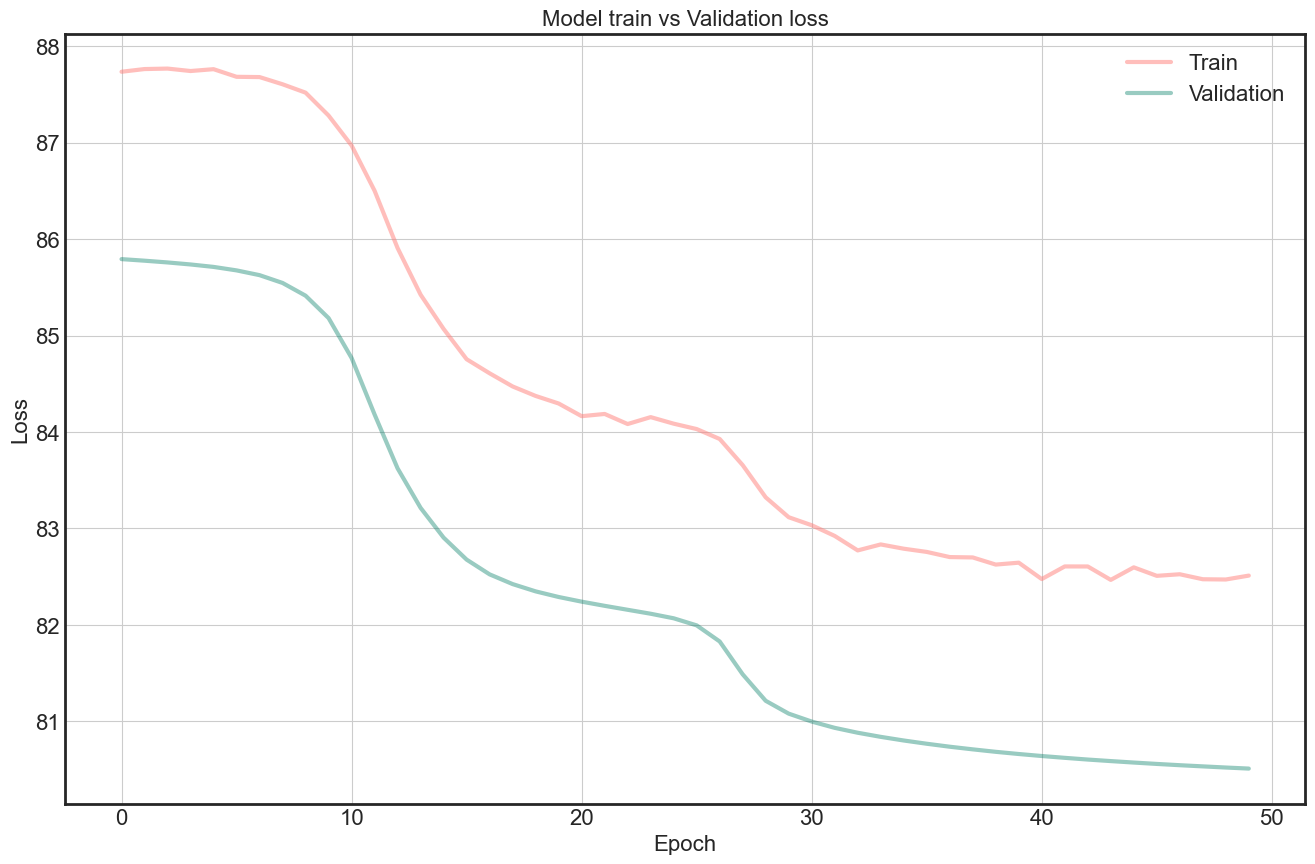

In [38]:
# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [39]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 82.51097869873047
Validation loss: 80.51024627685547


In [40]:
# Extract the encoded representation of the input data
from tensorflow.keras.models import Model
encoder = Model(inputs=input_layer, outputs=encoding_layer)
encoded_X = encoder.predict(X_test)

print(encoded_X.shape)

7/7 [==============================] - 0s 1ms/step
(200, 2)


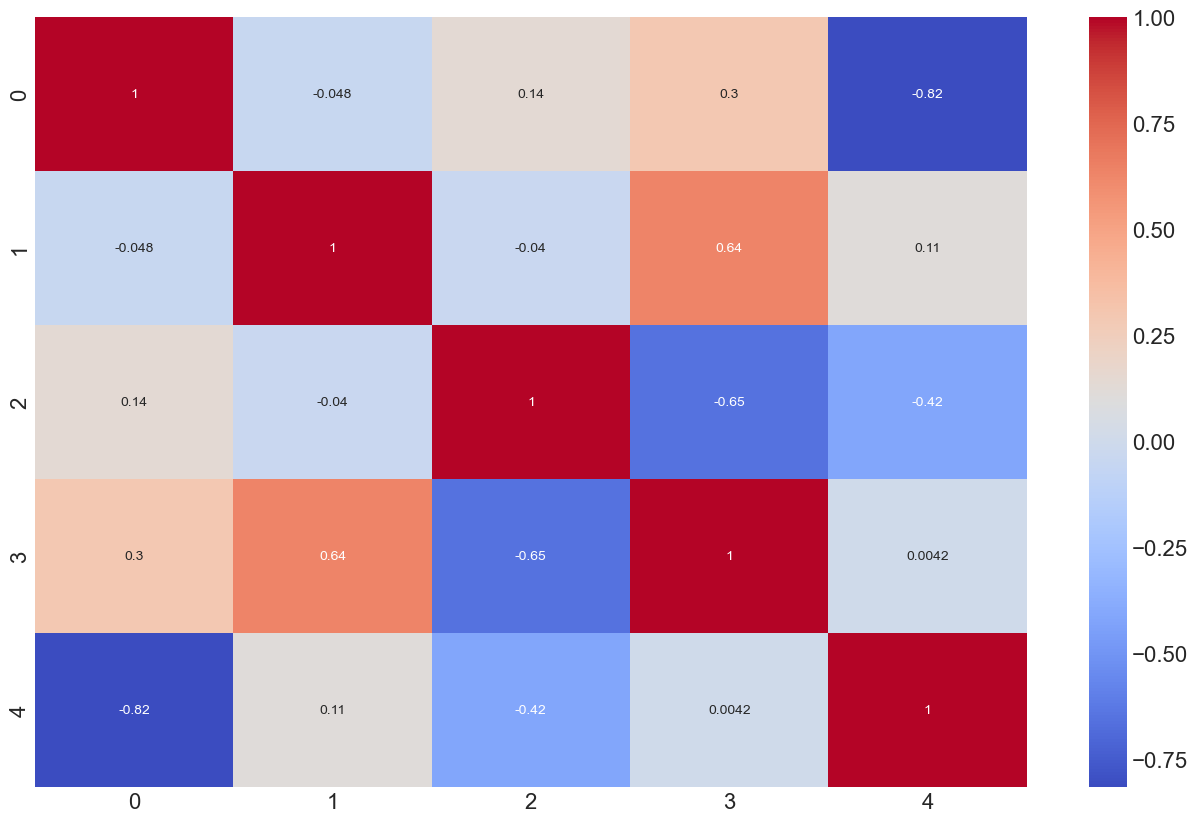

In [41]:
import numpy as np
import seaborn as sns
corr_mat = np.corrcoef(X_test.T, encoded_X.T)

# Display the correlation matrix as a heatmap
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

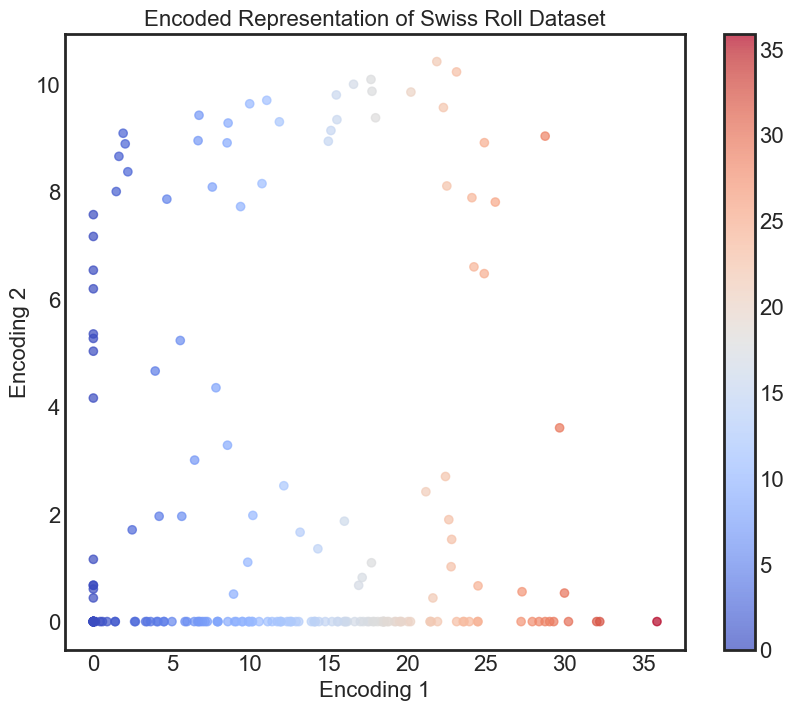

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sc = ax.scatter(encoded_X[:,0], encoded_X[:,1], c=encoded_X[:,0], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('Encoding 1')
ax.set_ylabel('Encoding 2')
plt.title('Encoded Representation of Swiss Roll Dataset')
plt.colorbar(sc)
plt.show()

## Using Frobenius as penality term

In [44]:
input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, activation='relu', name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, activation='sigmoid', name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)

def frobenius_penalty(y_true, y_pred):
    return 0.01 * tf.norm(encoder(y_true) - encoder(y_pred))

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse', metrics=[frobenius_penalty])
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 8         
                                                                 
 decoding (Dense)            (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [45]:

epochs=50
batch_size=32
shuffle=True
validation_split=0.2
verbose=0

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose,
                          callbacks=[early_stop])

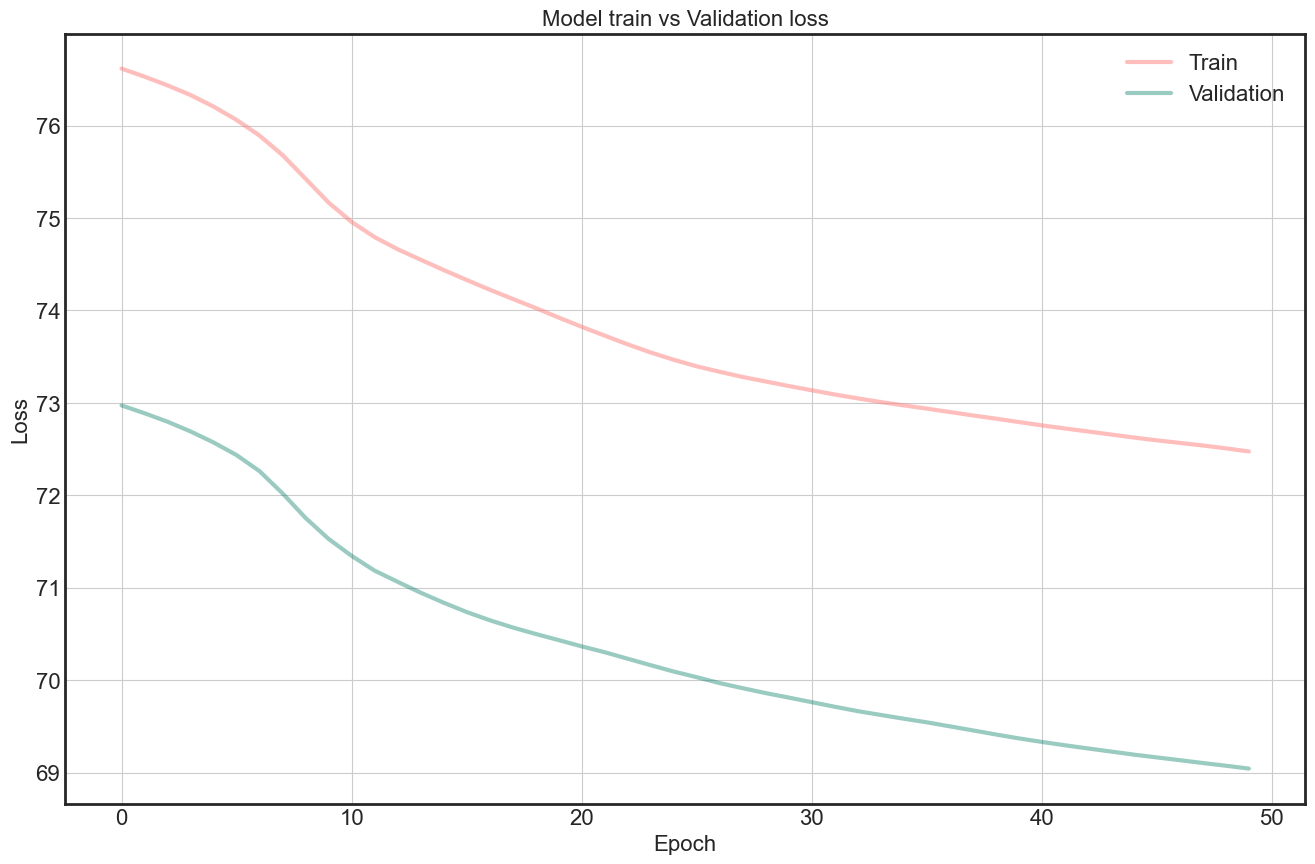

In [46]:
# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [47]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 72.47398376464844
Validation loss: 69.0425033569336


In [48]:
# Extract the encoded representation of the input data
from tensorflow.keras.models import Model
encoder = Model(inputs=input_layer, outputs=encoding_layer)
encoded_X = encoder.predict(X_test)

print(encoded_X.shape)

7/7 [==============================] - 0s 2ms/step
(200, 2)


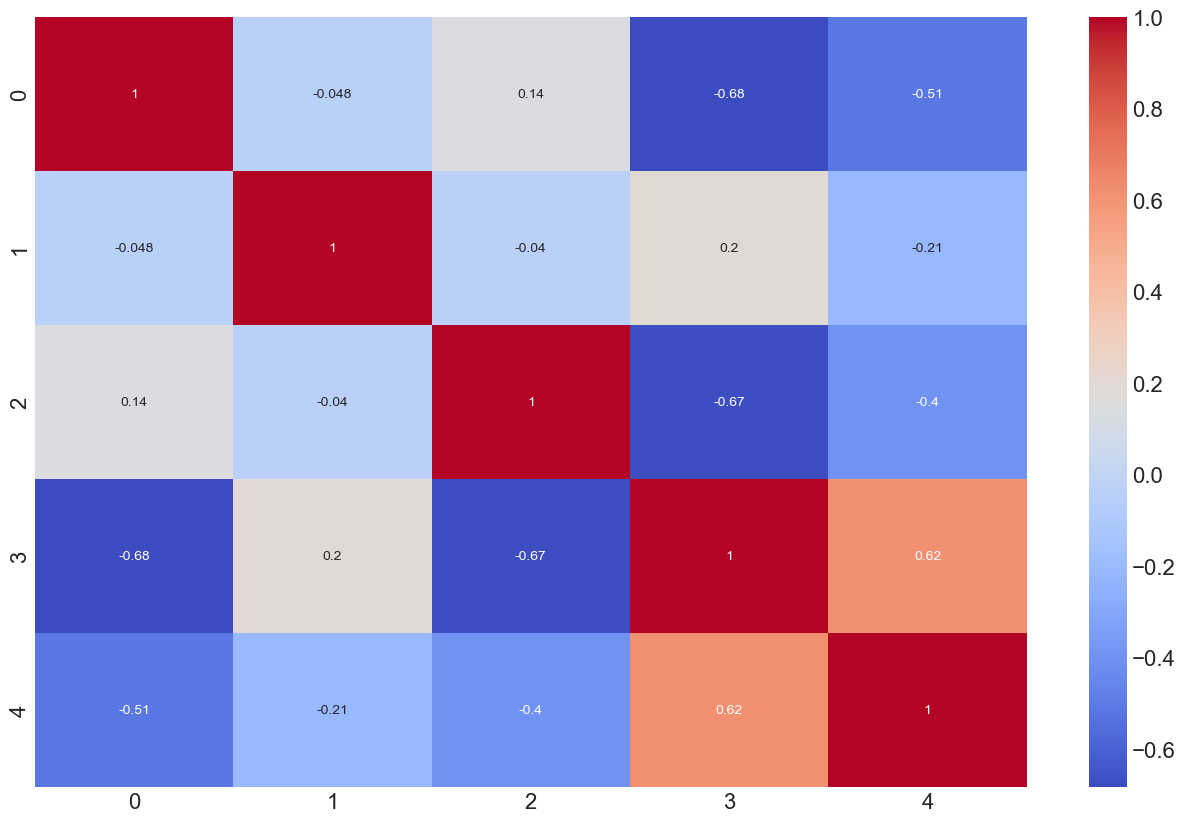

In [49]:
import numpy as np
import seaborn as sns
corr_mat = np.corrcoef(X_test.T, encoded_X.T)

# Display the correlation matrix as a heatmap
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

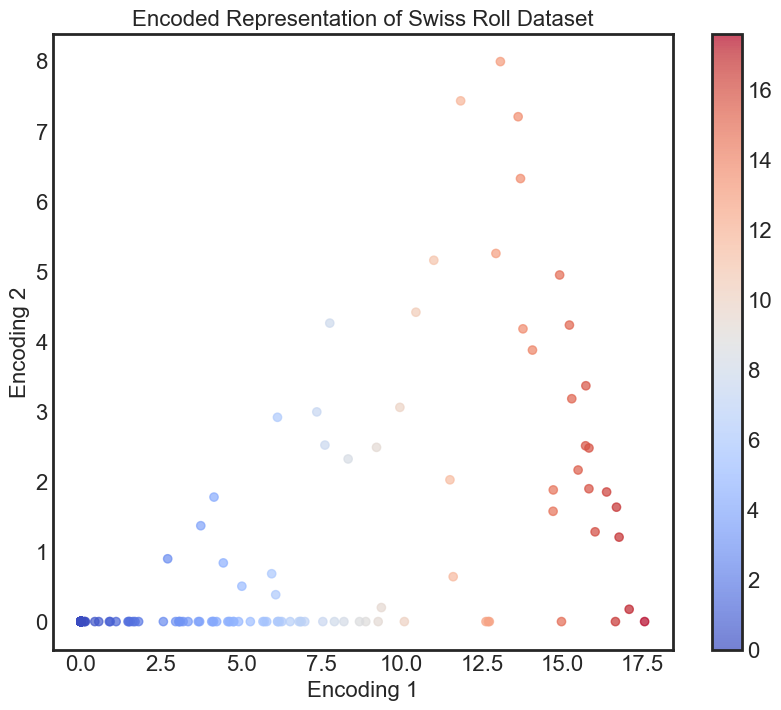

In [50]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sc = ax.scatter(encoded_X[:,0], encoded_X[:,1], c=encoded_X[:,0], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('Encoding 1')
ax.set_ylabel('Encoding 2')
plt.title('Encoded Representation of Swiss Roll Dataset')
plt.colorbar(sc)
plt.show()